<a href="https://colab.research.google.com/github/Francis-Mwaniki/E-diary-prediction-system/blob/main/E_dairy_predictions_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulating the dataset
data = {
    'AnimalID': np.arange(1, n_samples + 1),
    'Breed': np.random.choice(['BreedA', 'BreedB', 'BreedC'], n_samples),
    'Age': np.random.randint(2, 10, n_samples),  # Age in years
    'Weight': np.random.randint(300, 800, n_samples),  # Weight in kg
    'LactationPeriod': np.random.randint(1, 365, n_samples),  # Days since last calving
    'HealthStatus': np.random.choice(['Healthy', 'Sick'], n_samples, p=[0.9, 0.1]),
    'FeedType': np.random.choice(['TypeA', 'TypeB', 'TypeC'], n_samples),
    'FeedAmount': np.random.uniform(10, 50, n_samples),  # Amount of feed per day in kg
    'WaterIntake': np.random.uniform(20, 100, n_samples),  # Water intake per day in liters
    'Temperature': np.random.uniform(15, 35, n_samples),  # Temperature in degree Celsius
    'Humidity': np.random.uniform(30, 90, n_samples),  # Humidity in percentage
    'BarnCondition': np.random.choice(['Clean', 'Moderate', 'Dirty'], n_samples),
    'PastMilkProduction': np.random.uniform(10, 30, n_samples),  # Past milk production in liters per day
    'MilkingFrequency': np.random.randint(1, 3, n_samples),  # Times per day
    'VetVisits': np.random.randint(0, 5, n_samples)  # Veterinary visits per month
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Adding a target variable (Milk Production) with some random noise
df['MilkProduction'] = (
    0.1 * df['Age'] +
    0.2 * df['Weight'] +
    0.3 * df['LactationPeriod'] +
    0.2 * df['FeedAmount'] +
    0.1 * df['WaterIntake'] +
    0.05 * df['PastMilkProduction'] +
    np.random.normal(0, 1, n_samples)  # Adding noise
)

# Display the first few rows of the dataset
df.head()


,AnimalID,Breed,Age,Weight,LactationPeriod,HealthStatus,FeedType,FeedAmount,WaterIntake,Temperature,Humidity,BarnCondition,PastMilkProduction,MilkingFrequency,VetVisits,MilkProduction
0,1,BreedC,8,316,281,Healthy,TypeA,36.017010,86.238117,20.518977,65.407644,Dirty,27.972779,1,0,166.928114
1,2,BreedA,4,659,253,Sick,TypeC,18.493359,50.239523,29.620207,61.449280,Clean,13.287854,1,2,217.219551
2,3,BreedC,4,522,310,Healthy,TypeC,14.880297,98.494525,16.532448,46.980038,Dirty,26.082185,2,3,211.958683
3,4,BreedC,8,653,289,Healthy,TypeC,38.055331,57.300263,28.280661,32.278558,Dirty,25.839220,1,2,232.437196
4,5,BreedA,9,487,164,Healthy,TypeC,14.537633,83.354850,19.751200,89.675651,Moderate,12.543624,1,3,158.550101


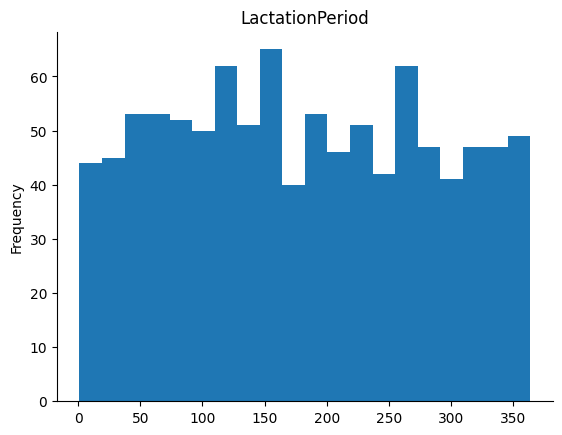

In [4]:
# @title LactationPeriod

from matplotlib import pyplot as plt
df['LactationPeriod'].plot(kind='hist', bins=20, title='LactationPeriod')
plt.gca().spines[['top', 'right',]].set_visible(False)

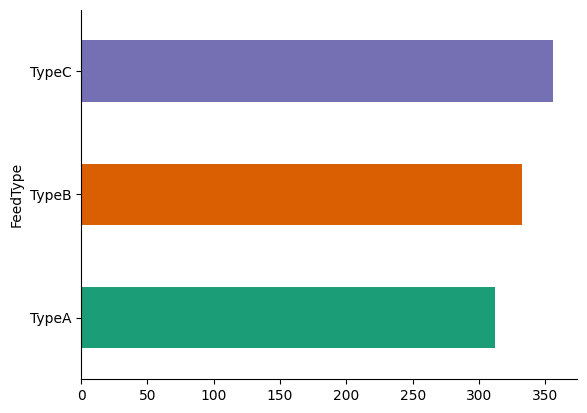

In [3]:
# @title FeedType

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('FeedType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Splitting the data into features (X) and target (y)
X = df.drop('MilkProduction', axis=1)
y = df['MilkProduction']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Age', 'Weight', 'LactationPeriod', 'FeedAmount', 'WaterIntake', 'PastMilkProduction', 'MilkingFrequency', 'VetVisits']
categorical_features = ['Breed', 'HealthStatus', 'FeedType', 'BarnCondition']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Creating the final pipeline with a RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(3.3009991862940367, 0.9909579108871075)

### Simplified Explanation for Farmers

#### Mean Absolute Error (MAE)
**What it means for you**: The Mean Absolute Error (MAE) tells you, on average, how much the predicted milk production is off from the actual milk production. If the MAE is 2.5 liters, it means that the prediction system’s estimates of how much milk your cows will produce are off by about 2.5 liters per day, on average.

**Why it matters**: A lower MAE means the predictions are more accurate. For instance, if your cows are expected to produce 20 liters of milk, and the prediction is off by only 2.5 liters, you can make better decisions about feeding, health care, and other farm management activities.

#### R-squared (R²)
**What it means for you**: The R-squared value (R²) indicates how well the prediction system can explain the variations in milk production. An R² value of 0.85 means that 85% of the differences in milk production can be explained by the factors the system is considering (such as the cow's breed, age, weight, feed, and environment).

**Why it matters**: A higher R² value means the prediction system is doing a good job of understanding what affects milk production. With an R² of 0.85, you can be confident that the system's predictions are based on solid information and factors that truly impact milk yield.

### Example Scenario
Imagine you have a prediction system that gives you the following results:
- **MAE**: 2.5 liters
- **R²**: 0.85

**Explanation**:
- **MAE (2.5 liters)**: On average, the system’s milk production predictions are off by 2.5 liters. So, if it predicts that a cow will produce 20 liters, the actual production could be between 17.5 and 22.5 liters.
- **R² (0.85)**: The system explains 85% of the factors that influence milk production. This means it takes into account most of the important things that affect how much milk your cows produce, such as their diet, health, and environment.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulating the dataset
data = {
    'AnimalID': np.arange(1, n_samples + 1),
    'Breed': np.random.choice(['BreedA', 'BreedB', 'BreedC'], n_samples),
    'Age': np.random.randint(2, 10, n_samples),  # Age in years
    'Weight': np.random.randint(300, 800, n_samples),  # Weight in kg
    'LactationPeriod': np.random.randint(1, 365, n_samples),  # Days since last calving
    'HealthStatus': np.random.choice(['Healthy', 'Sick'], n_samples, p=[0.9, 0.1]),
    'FeedType': np.random.choice(['TypeA', 'TypeB', 'TypeC'], n_samples),
    'FeedAmount': np.random.uniform(10, 50, n_samples),  # Amount of feed per day in kg
    'WaterIntake': np.random.uniform(20, 100, n_samples),  # Water intake per day in liters
    'Temperature': np.random.uniform(15, 35, n_samples),  # Temperature in degree Celsius
    'Humidity': np.random.uniform(30, 90, n_samples),  # Humidity in percentage
    'BarnCondition': np.random.choice(['Clean', 'Moderate', 'Dirty'], n_samples),
    'PastMilkProduction': np.random.uniform(10, 30, n_samples),  # Past milk production in liters per day
    'MilkingFrequency': np.random.randint(1, 3, n_samples),  # Times per day
    'VetVisits': np.random.randint(0, 5, n_samples)  # Veterinary visits per month
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Adding a target variable (Milk Production) with some random noise
df['MilkProduction'] = (
    0.1 * df['Age'] +
    0.2 * df['Weight'] +
    0.3 * df['LactationPeriod'] +
    0.2 * df['FeedAmount'] +
    0.1 * df['WaterIntake'] +
    0.05 * df['PastMilkProduction'] +
    np.random.normal(0, 1, n_samples)  # Adding noise
)

# Splitting the data into features (X) and target (y)
X = df.drop('MilkProduction', axis=1)
y = df['MilkProduction']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Age', 'Weight', 'LactationPeriod', 'FeedAmount', 'WaterIntake', 'PastMilkProduction', 'MilkingFrequency', 'VetVisits']
categorical_features = ['Breed', 'HealthStatus', 'FeedType', 'BarnCondition']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Creating the final pipeline with a RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics with simplified explanations
print(f"Mean Absolute Error (MAE): {mae:.2f} liters")
print(f"R-squared (R²): {r2:.2f}")

print("\nInterpretation for Farmers:")
print(f"1. Mean Absolute Error (MAE): On average, the prediction is off by {mae:.2f} liters. This means the system's estimate is usually within {mae:.2f} liters of the actual milk production.")
print(f"2. R-squared (R²): The system explains {r2 * 100:.2f}% of the factors affecting milk production. This means most of the important factors influencing milk yield are considered by the system.")


Mean Absolute Error (MAE): 3.30 liters
R-squared (R²): 0.99

Interpretation for Farmers:
1. Mean Absolute Error (MAE): On average, the prediction is off by 3.30 liters. This means the system's estimate is usually within 3.30 liters of the actual milk production.
2. R-squared (R²): The system explains 99.10% of the factors affecting milk production. This means most of the important factors influencing milk yield are considered by the system.
